<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/Comparison_of_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Import Libararies#
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('House_Pricing.csv')

In [46]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Check for empty data sets

In [47]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [48]:
#Analyse Data#
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [49]:
#Reaname Column#
df.rename(columns={'furnishingstatus': 'furnishing'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
 12  furnishing       545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
import matplotlib.pyplot as plt

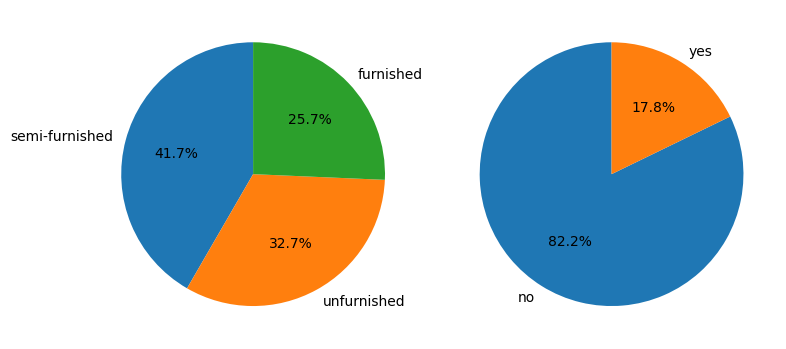

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].pie(df['furnishing'].value_counts(),
        labels=df['furnishing'].value_counts().index,
        autopct = '%1.1f%%',
        startangle=90)
axs[1].pie(df['guestroom'].value_counts(),
        labels=df['guestroom'].value_counts().index,
        autopct = '%1.1f%%',
        startangle=90)
plt.tight_layout()
plt.show()

<ipython-input-52-9712865a6139>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='r', hist_kws=dict(edgecolor='black', linewidth=2))


<function matplotlib.pyplot.show(close=None, block=None)>

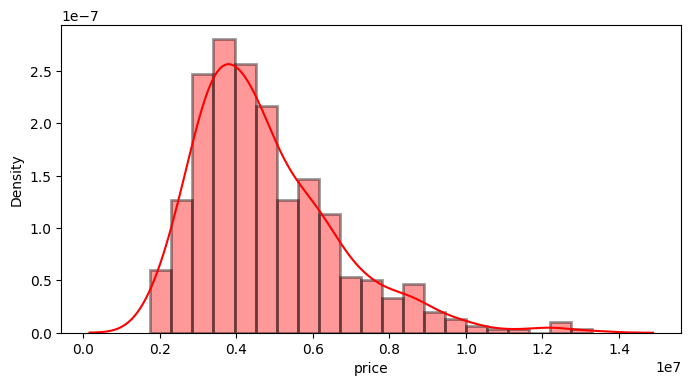

In [52]:
#Show distribution of price#
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.distplot(df['price'], color='r', hist_kws=dict(edgecolor='black', linewidth=2))
plt.show

In [53]:
features = ['price', 'bedrooms','bathrooms','stories', 'parking']
data = df[features].copy()
data

,price,bedrooms,bathrooms,stories,parking
0,13300000,4,2,3,2
1,12250000,4,4,4,3
2,12250000,3,2,2,2
3,12215000,4,2,2,3
4,11410000,4,1,2,2
...,...,...,...,...,...
540,1820000,2,1,1,2
541,1767150,3,1,1,0
542,1750000,2,1,1,0
543,1750000,3,1,1,0


<Axes: >

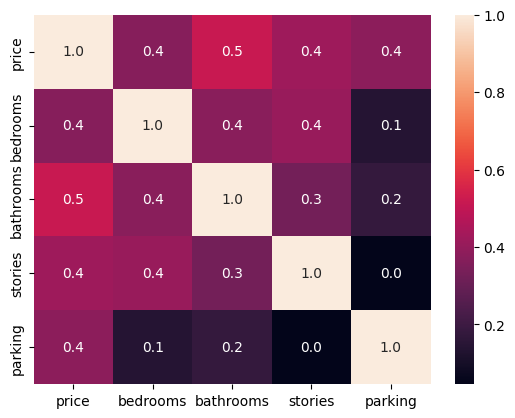

In [54]:
#Feature Selection#
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.1f')

In [55]:
#Bathrooms has the highest relationship#

Split data

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
X = df[['bathrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
#Baseline data#
y_mean = y_train.mean()
y_pred_baseline =  [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
r2_score_baseline = r2_score(y_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_pred_baseline))
print('mae_baseline:', round(mae_baseline, 2))
print('r2_score_baseline:', round(r2_score_baseline, 2))
print('rmse_baseline:', round(rmse_baseline, 2))

mae_baseline: 1350725.7
r2_score_baseline: 0.0
rmse_baseline: 1755959.1


In [63]:
#Build model#

Linear Regression Model

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Train the data#

In [66]:
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_score_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('mae_train:', round(mae_train, 2))
print('r2_score_train:', round(r2_score_train, 2))
print('rmse_train:', round(rmse_train, 2))

mae_train: 1135190.71
r2_score_train: 0.28
rmse_train: 1486283.88


In [ ]:
#test data#

In [67]:
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('mae_test:', round(mae_test, 2))
print('r2_score_test:', round(r2_score_test, 2))
print('rmse_test:', round(rmse_test, 2))

mae_test: 1499746.43
r2_score_test: 0.22
rmse_test: 1987762.38


In [ ]:
#Visualise the data#

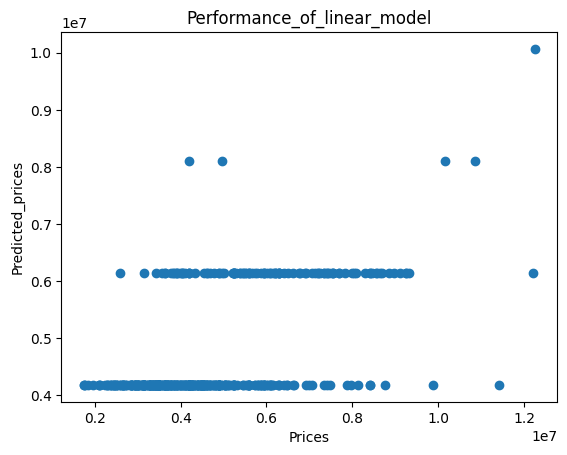

In [70]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Prices')
plt.ylabel('Predicted_prices')
plt.title('Performance_of_linear_model')
plt.show()

XGBoost Regressor Model

In [72]:
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Train the data#

In [74]:
reg_y_pred_train = reg.predict(X_train)
reg_mae_train = mean_absolute_error(y_train, reg_y_pred_train)
reg_r2_score_train = r2_score(y_train, reg_y_pred_train)
reg_rmse_train = np.sqrt(mean_squared_error(y_train, reg_y_pred_train))
print('reg_mae_train:', round(reg_mae_train, 2))
print('reg_r2_score_train:', round(reg_r2_score_train, 2))
print('reg_rmse_train:', round(reg_rmse_train, 2))


reg_mae_train: 1130289.75
reg_r2_score_train: 0.29
reg_rmse_train: 1481578.32


In [75]:
#Test the Data#
reg_y_pred_test = reg.predict(X_test)
reg_mae_test = mean_absolute_error(y_test, reg_y_pred_test)
reg_r2_score_test = r2_score(y_test, reg_y_pred_test)
reg_rmse_test = np.sqrt(mean_squared_error(y_test, reg_y_pred_test))
print('reg_mae_test:', round(reg_mae_test, 2))
print('reg_r2_score_test:', round(reg_r2_score_test, 2))
print('reg_rmse_test:', round(reg_rmse_test, 2))

reg_mae_test: 1500990.38
reg_r2_score_test: 0.23
reg_rmse_test: 1977311.92


In [ ]:
#Visulaize the data#

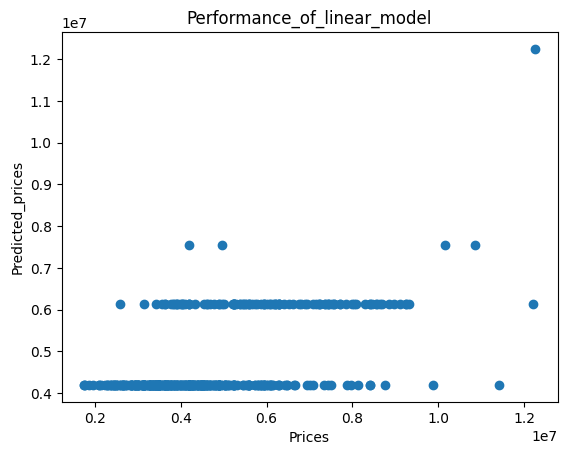

In [76]:
plt.scatter(y_train, reg_y_pred_train)
plt.xlabel('Prices')
plt.ylabel('Predicted_prices')
plt.title('Performance_of_linear_model')
plt.show()

RANDOM FOREST REGRESSOR

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rmr = RandomForestRegressor()
rmr.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
#Train the data#
rmr_y_pred_train = rmr.predict(X_train)
rmr_mae_train = mean_absolute_error(y_train, rmr_y_pred_train)
rmr_r2_score_train = r2_score(y_train, rmr_y_pred_train)
rmr_rmse_train = np.sqrt(mean_squared_error(y_train, reg_y_pred_train))
print('rmr_mae_train:', round(rmr_mae_train, 2))
print('rmr_r2_score_train:', round(rmr_r2_score_train, 2))
print('rmr_rmse_train:', round(rmr_rmse_train, 2))

rmr_mae_train: 1132776.37
rmr_r2_score_train: 0.29
rmr_rmse_train: 1481578.32


In [83]:
#Test the data#
rmr_y_pred_test = rmr.predict(X_test)
rmr_mae_test = mean_absolute_error(y_test, rmr_y_pred_test)
rmr_r2_score_test = r2_score(y_test, rmr_y_pred_test)
rmr_rmse_test = np.sqrt(mean_squared_error(y_train, reg_y_pred_train))
print('rmr_mae_test:', round(rmr_mae_test, 2))
print('rmr_r2_score_test:', round(rmr_r2_score_test, 2))
print('rmr_rmse_test:', round(rmr_rmse_test, 2))

rmr_mae_test: 1502444.49
rmr_r2_score_test: 0.23
rmr_rmse_test: 1481578.32


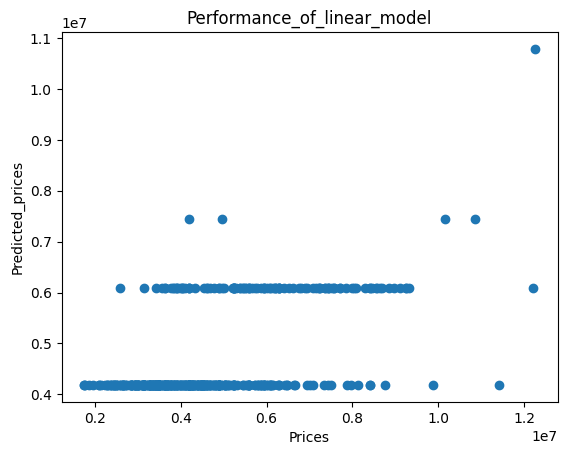

In [84]:
#Visualise the data
plt.scatter(y_train, rmr_y_pred_train)
plt.xlabel('Prices')
plt.ylabel('Predicted_prices')
plt.title('Performance_of_linear_model')
plt.show()

Support Vector Machines

In [85]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import SVM#
reg = svm.SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc, They transform data into
#higher dimensional space#
reg.fit(X_train, y_train)


SVR()

In [92]:
#Train the data#
svm_y_pred_train = reg.predict(X_train)
svm_mae_train = mean_absolute_error(y_train, svm_y_pred_train)
svm_r2_score_train = r2_score(y_train, svm_y_pred_train)
svm_rmse_train = np.sqrt(mean_squared_error(y_train, svm_y_pred_train))
print('svm_mae_train:', round(svm_mae_train, 2))
print('svm_r2_score_train:', round(svm_r2_score_train, 2))
print('svm_rmse_train:', round(svm_rmse_train, 2))

svm_mae_train: 1309725.21
svm_r2_score_train: -0.06
svm_rmse_train: 1804420.29


In [93]:
#Test Data#
svm_y_pred_test = reg.predict(X_test)
svm_mae_test = mean_absolute_error(y_test, svm_y_pred_test)
svm_r2_score_test = r2_score(y_test, svm_y_pred_test)
svm_rmse_test = np.sqrt(mean_squared_error(y_test, svm_y_pred_test))
print('svm_mae_test:', round(svm_mae_test, 2))
print('svm_r2_score_test:', round(svm_r2_score_test, 2))
print('svm_rmse_test:', round(svm_rmse_test, 2))

svm_mae_test: 1763881.81
svm_r2_score_test: -0.1
svm_rmse_test: 2359623.47


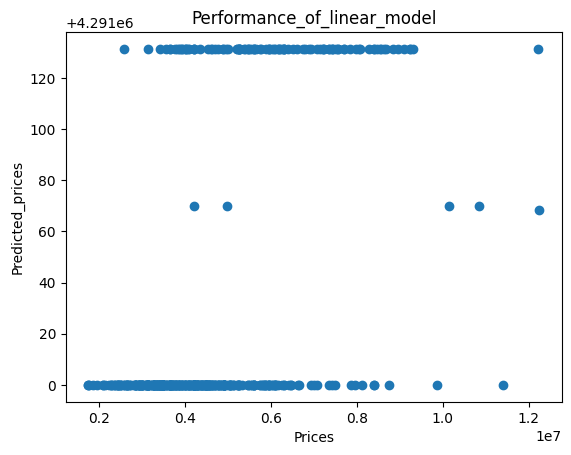

In [94]:
#Visualise the data
plt.scatter(y_train, svm_y_pred_train)
plt.xlabel('Prices')
plt.ylabel('Predicted_prices')
plt.title('Performance_of_linear_model')
plt.show()

COMPARISON

In [95]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [r2_score_test*100, rmr_r2_score_test*100, reg_r2_score_test*100, svm_r2_score_test*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,22.648966
1,Random Forest,22.594834
0,Linear Regression,21.829175
3,Support Vector Machines,-10.154230


In [ ]:
#XG Boost had the best performance#

**Analysis**
1)XG Boost has the best performance overall
2) The shape of the scatter graphs show that the bedrooms are not a good feature to have used to predict pricing